In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np


In [4]:
df_games = pd.read_csv('bball.csv')

In [5]:
df_games['venue'] = np.where(df_games['in_Cameron'] == 0, 'Other ACC Venue', 'Cameron')

In [6]:
df_games.tail(10)

,year,date,location,in_Cameron,did_win,team,opp,result,pts,pos,...,def_efg,def_to,def_or,def_ftr,game_score,season,tempo,coach,opp_coach,venue
1617,2022,12/28/2021,A,0,1,Notre Dame,Pittsburgh,"W, 68-67",68,62,...,50.0,9.6,16.1,43.1,51.7,2022,62.8,Mike Brey,Jeff Capel,Other ACC Venue
1618,2022,12/22/2021,A,0,1,Clemson,Virginia,"W, 67-50",67,61,...,43.9,22.6,6.9,46.3,98.7,2022,61.9,Brad Brownell,Tony Bennett,Other ACC Venue
1619,2022,12/22/2021,A,1,0,Virginia Tech,Duke,"L, 76-65",65,63,...,58.3,17.2,29.6,29.6,87.0,2022,63.9,Mike Young,Mike Krzyzewski,Cameron
1620,2022,12/5/2021,A,0,1,North Carolina,Georgia Tech,"W, 79-62",79,66,...,51.9,19.7,13.3,13.0,91.6,2022,66.1,Hubert Davis,Josh Pastner,Other ACC Venue
1621,2022,12/4/2021,A,0,0,Clemson,Miami FL,"L, 80-75",75,67,...,59.1,11.9,13.3,30.9,87.1,2022,67.4,Brad Brownell,Jim Larranaga,Other ACC Venue
1622,2022,12/4/2021,A,0,1,Wake Forest,Virginia Tech,"W, 80-61",80,60,...,48.2,19.8,34.4,14.3,99.3,2022,60.8,Steve Forbes,Mike Young,Other ACC Venue
1623,2022,12/4/2021,A,0,1,Louisville,North Carolina St.,"W, 73-68",73,66,...,46.7,9.0,17.9,30.0,82.7,2022,66.8,Chris Mack,Kevin Keatts,Other ACC Venue
1624,2022,12/4/2021,A,0,1,Syracuse,Florida St.,"W, 63-60",63,69,...,38.1,15.9,30.0,25.4,76.1,2022,69.4,Jim Boeheim,Leonard Hamilton,Other ACC Venue
1625,2022,12/3/2021,A,0,0,Notre Dame,Boston College,"L, 73-57",57,63,...,54.5,17.3,32.3,30.9,10.2,2022,63.7,Mike Brey,Earl Grant,Other ACC Venue
1626,2022,12/3/2021,A,0,0,Pittsburgh,Virginia,"L, 57-56",56,52,...,50.0,11.3,31.0,13.5,76.6,2022,53.0,Jeff Capel,Tony Bennett,Other ACC Venue


In [7]:
df_games.columns

Index(['year', 'date', 'location', 'in_Cameron', 'did_win', 'team', 'opp',
       'result', 'pts', 'pos', 'to', 'to_percent', 'fgm', 'fga', 'fg_percent',
       'ftm', 'fta', 'ft_percent', 'pf', 'biggest_lead', 'biggest_run',
       'game_id', 'type', 'conf', 'opp_conf', 'avg_marg', 'opp_avg_marg',
       'adj_o', 'adj_d', 'off_ppp', 'off_efg', 'off_to', 'off_or', 'off_ftr',
       'def_ppp', 'def_efg', 'def_to', 'def_or', 'def_ftr', 'game_score',
       'season', 'tempo', 'coach', 'opp_coach', 'venue'],
      dtype='object')

In [8]:
def ttest_by_year_o(year):
    df_year = df_games[df_games['year'] == year]
    df_cameron = df_year[df_year['in_Cameron'] == 1]
    
    o_rtg_cameron = df_cameron['adj_o']
    o_rtg_other = df_year[df_year['in_Cameron'] == 0]['adj_o']
    return stats.ttest_ind(o_rtg_other, o_rtg_cameron, alternative='greater')[1]

def ttest_by_year_d(year):
    df_year = df_games[df_games['year'] == year]
    df_cameron = df_year[df_year['in_Cameron'] == 1]
    
    d_rtg_cameron = df_cameron['adj_d']
    d_rtg_other = df_year[df_year['in_Cameron'] == 0]['adj_d']
    return stats.ttest_ind(d_rtg_other, d_rtg_cameron, alternative='less')[1]

In [9]:
p_value_o = []
p_value_d = []

In [10]:
for year in df_games['year'].unique():
    p_value_o.append(ttest_by_year_o(year))
    p_value_d.append(ttest_by_year_d(year))

In [11]:
p_value_o

[0.2371284482617818,
 0.17682213163028604,
 0.8989981777719763,
 0.7871534889963204,
 0.06720727356579556,
 0.3578791519605062,
 0.4304724622230415,
 0.6880254074223504,
 0.06316904527668799,
 0.35067317440632373,
 0.33457275020483124,
 0.8845727513240833,
 0.5653121839323209]

In [12]:
p_value_d

[0.46468633400121234,
 0.9382293510192022,
 0.86803373262654,
 0.2914376929014665,
 0.6191669440637434,
 0.4301794925683191,
 0.6844042623762632,
 0.4382740642976408,
 0.8830302499884279,
 0.858779451296761,
 0.056884540395772155,
 0.18086552090844005,
 0.9507409629712744]

True


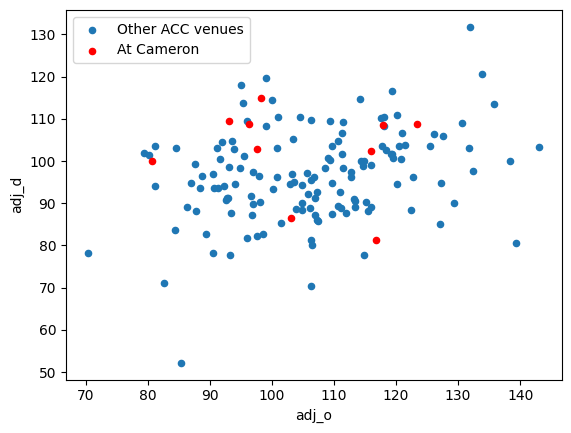

In [13]:
ax1 = df_games[(df_games['year'] == 2020) & (df_games['in_Cameron'] == 0)].plot.scatter(x='adj_o', y='adj_d', label = 'Other ACC venues')
ax2 = df_games[(df_games['year'] == 2020) & (df_games['in_Cameron'] == 1)].plot.scatter(x='adj_o', y='adj_d', color = 'r', ax=ax1, label = 'At Cameron')
print(ax1 == ax2)

<Axes: xlabel='adj_o', ylabel='venue'>

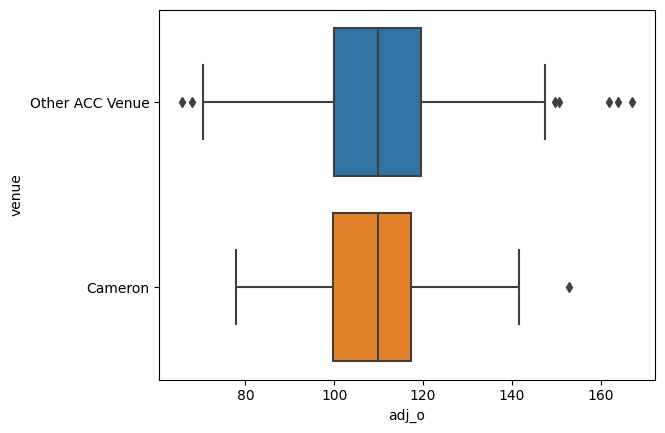

In [14]:
sns.boxplot(data=df_games, x='adj_o', y = 'venue')

<Axes: xlabel='adj_d', ylabel='venue'>

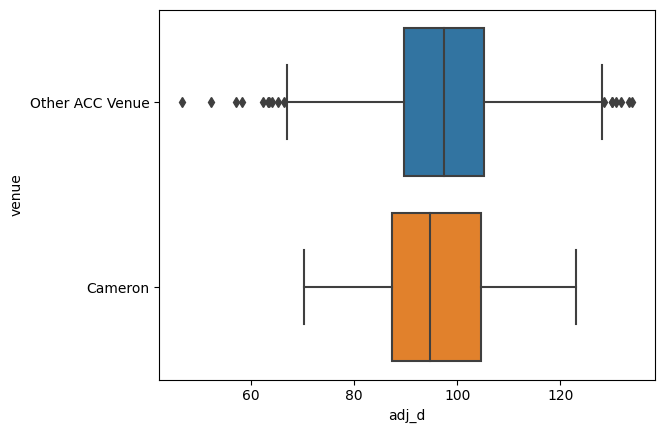

In [15]:
sns.boxplot(data=df_games, x='adj_d', y = 'venue')

In [22]:
stats.ttest_ind(df_games[(df_games['in_Cameron'] == 0)]['adj_o'], df_games[df_games['in_Cameron'] == 1]['adj_o'], alternative='greater')[1]

0.2364506745748044

In [24]:
stats.ttest_ind(df_games[(df_games['in_Cameron'] == 0)]['adj_d'], df_games[df_games['in_Cameron'] == 1]['adj_d'], alternative='less')[1]

0.8738730212212806

In [16]:
stats.ttest_ind(df_games[(df_games['in_Cameron'] == 0) & (df_games['team'] == 'Duke')]['def_ftr'], df_games[df_games['in_Cameron'] == 1]['off_ftr'], alternative='greater')[1]

0.0004800192312986998

In [17]:
df_games[(df_games['in_Cameron'] == 0) & (df_games['team'] == 'Duke')]

,year,date,location,in_Cameron,did_win,team,opp,result,pts,pos,...,def_efg,def_to,def_or,def_ftr,game_score,season,tempo,coach,opp_coach,venue
8,2010,3/3/2010,A,0,0,Duke,Maryland,"L, 79-72",72,67,...,55.4,16.2,27.6,33.9,83.9,2010,67.8,Mike Krzyzewski,Gary Williams,Other ACC Venue
13,2010,2/28/2010,A,0,1,Duke,Virginia,"W, 67-49",67,62,...,33.3,22.3,27.0,35.3,99.6,2010,62.8,Mike Krzyzewski,Tony Bennett,Other ACC Venue
29,2010,2/17/2010,A,0,1,Duke,Miami FL,"W, 81-74",81,68,...,60.0,32.1,47.8,60.0,90.5,2010,68.6,Mike Krzyzewski,Frank Haith,Other ACC Venue
40,2010,2/10/2010,A,0,1,Duke,North Carolina,"W, 64-54",64,63,...,38.8,19.0,33.3,27.6,94.8,2010,63.1,Mike Krzyzewski,Roy Williams,Other ACC Venue
47,2010,2/6/2010,A,0,1,Duke,Boston College,"W, 66-63",66,60,...,43.1,14.9,40.6,25.9,94.0,2010,60.2,Mike Krzyzewski,Al Skinner,Other ACC Venue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,2022,2/5/2022,A,0,1,Duke,North Carolina,"W, 87-67",87,68,...,48.3,11.7,15.8,25.4,99.8,2022,68.7,Mike Krzyzewski,Hubert Davis,Other ACC Venue
1551,2022,1/31/2022,A,0,1,Duke,Notre Dame,"W, 57-43",57,65,...,30.3,18.2,23.9,14.8,99.7,2022,65.8,Mike Krzyzewski,Mike Brey,Other ACC Venue
1553,2022,1/29/2022,A,0,1,Duke,Louisville,"W, 74-65",74,63,...,49.2,14.1,27.0,22.0,92.3,2022,63.9,Mike Krzyzewski,Chris Mack,Other ACC Venue
1581,2022,1/18/2022,A,0,0,Duke,Florida St.,"L, 79-78",78,71,...,40.4,7.0,38.8,34.2,69.9,2022,63.3,Mike Krzyzewski,Leonard Hamilton,Other ACC Venue


In [18]:
#Opponents ftr vs Duke, at other venue vs at Cameron
#stats.ttest_ind(df_games[(df_games['in_Cameron'] == 0) & (df_games['team'] == 'Duke')]['def_ftr'], df_games[df_games['in_Cameron'] == 1]['off_ftr'], alternative='greater')[1]
stats.ttest_ind(df_games[(df_games['in_Cameron'] == 0) & (df_games['team'] != 'Duke')]['off_ftr'], df_games[df_games['in_Cameron'] == 1]['off_ftr'], alternative='greater')[1]

0.016281919754622794

True


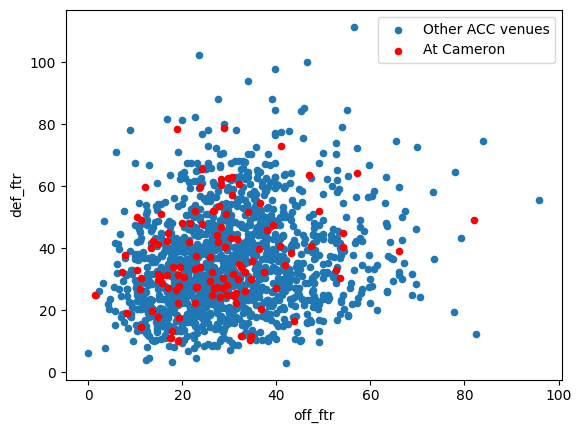

In [19]:
ax1 = df_games[(df_games['in_Cameron'] == 0) & (df_games['team'] != 'Duke')].plot.scatter(x='off_ftr', y='def_ftr', label = 'Other ACC venues')
ax2 = df_games[df_games['in_Cameron'] == 1].plot.scatter(x='off_ftr', y='def_ftr', color = 'r', ax=ax1, label = 'At Cameron')
print(ax1 == ax2)

In [20]:
stats.ttest_ind(df_games[(df_games['team'] == 'Duke')]['off_ftr'], df_games[(df_games['team'] != 'Duke')]['off_ftr'], alternative='greater')[1]

0.00775193324517445

In [21]:
stats.linregress(df_games[(df_games['team'] == 'Duke')]['off_ftr'], df_games[(df_games['team'] != 'Duke')]['off_ftr'])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 116 and the array at index 1 has size 1511